### NAME : ADWIK GUPTA
### ROLL NO. 220085

### PART A: Cart Pole Balancing using Policy Gradient

**Sol 1.**

$\nabla_{\theta} \ln \pi(A_t | S_t, \theta) = \text{onehot}(A_t) - \pi(S_t, \theta) . (element wise multiplication) S_t$

**Sol 2.**

In [54]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

## Defining the Policy

In [83]:
def softmax(x):
    e = np.exp(x - np.max(x))
    return e / e.sum(axis=0)

class Policy:
    def __init__(self):
        # Initialize weights randomly
        self.theta = np.random.rand(2, 4) 

    def predict(self, state):
        z = np.dot(self.theta, state)
        return softmax(z)

    def sample_action(self, state):
        prob = self.predict(state)
        return np.random.choice(len(prob), p=prob)

    def grad_log_p(self, state, action):
        probs = self.predict(state)
        # Create a one-hot encoded vector of the action
        d_softmax = np.zeros_like(probs)
        d_softmax[action] = 1

        # Gradient of log probabilities
        gradient = np.outer(d_softmax - probs, state)
        return gradient

## REINFORCE algorithm

In [84]:
def reinforce(env, policy, episodes, gamma=0.99, learning_rate=1e-2, render=False):
    episode_rewards = []

    for ep in range(episodes):
        state, _ = env.reset()
        transitions = []
        rewards = []
        done = False
        total_reward = 0

        while not done:
            if render:
                env.render()
            action = policy.sample_action(state)
            next_state, reward, done, _, _ = env.step(action)
            transitions.append((state, action))
            rewards.append(reward)
            state = next_state
            total_reward += reward
            if total_reward >= 500:
                break

        episode_rewards.append(sum(rewards))
        G = 0
        for t in reversed(range(len(transitions))):
            state, action = transitions[t]
            G = rewards[t] + gamma * G
            grad = policy.grad_log_p(state, action)
            policy.theta += learning_rate * G * grad

    return episode_rewards

In [85]:
def plot_rewards(rewards):
    plt.plot(rewards)
    plt.title('Training Rewards Over Time')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.show()

**3. Plot the training rewards over 1000 episodes [2 Marks]**


**Answer 3**

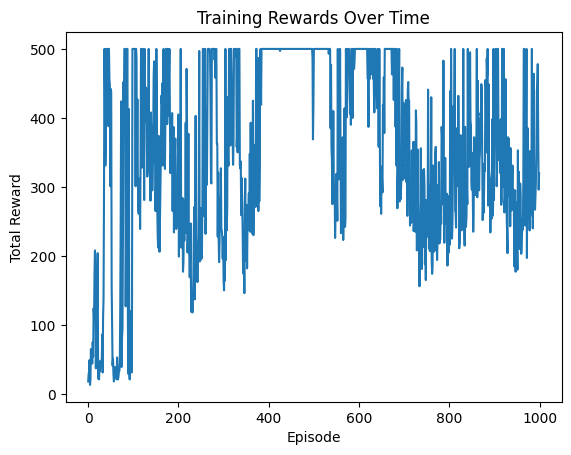

In [104]:
env = gym.make('CartPole-v1')
policy = Policy()
episodes = 1000
rewards = reinforce(env, policy, episodes)
plot_rewards(rewards)

**4. Test the trained policy and compute the average reward over 5 episodes [1 Marks]**

**Answer 4**

In [91]:
total_rewards = []
for _ in range(5):
    state = env.reset()[0]
    done = False
    total_reward = 0
    while not done:
        action = policy.sample_action(state)
        state, reward, done, _, _ = env.step(action)
        total_reward += reward
    total_rewards.append(total_reward)
print(f'Average reward over 5 episodes: {sum(total_rewards) / 5}')

Average reward over 5 episodes: 606.6


**5. Implement REINFORCE algorithm with baseline as shown in Figure 2 with appropriate choice of algorithm parameters. Take the state value function as a linear function of the state [7 Marks] ̂ 𝑣(𝑠, 𝑤) = 𝐰⊤𝑠**

**Answer 5**

In [92]:
class PolicyWithBaseline:
    def __init__(self):
        # Initialize weights randomly
        self.theta = np.random.rand(2, 4)  # 2 actions, 4 state variables
        self.w = np.random.rand(4)

    def predict(self, state):
        z = np.dot(self.theta, state)
        return softmax(z)

    def sample_action(self, state):
        probabilities = self.predict(state)
        return np.random.choice(len(probabilities), p=probabilities)

    def grad_log_p(self, state, action):
        probs = self.predict(state)
        # Create a one-hot encoded vector of the action
        d_softmax = np.zeros_like(probs)
        d_softmax[action] = 1

        # Gradient of log probabilities
        grad = np.outer(d_softmax - probs, state)
        return grad

    def v_hat(self, state):
        return np.dot(self.w, state)

In [93]:
def reinforce_with_baseline(env, policy, episodes, gamma=0.99, learning_rate=1e-2, render=False):
    episode_rewards = []

    for ep in range(episodes):
        state, _ = env.reset()
        transitions = []
        rewards = []
        done = False
        total_reward = 0

        while not done:
            if render:
                env.render()
            action = policy.sample_action(state)
            next_state, reward, done, _, _ = env.step(action)
            transitions.append((state, action))
            rewards.append(reward)
            state = next_state
            total_reward += reward
            if total_reward >= 500:
                break

        episode_rewards.append(sum(rewards))
        G = 0
        for t in reversed(range(len(transitions))):
            state, action = transitions[t]
            G = rewards[t] + gamma * G
            grad = policy.grad_log_p(state, action)
            v_hat = policy.v_hat(state)
            policy.theta += learning_rate * (G - v_hat) * grad
            policy.w += learning_rate * (G - v_hat) * state

    return episode_rewards

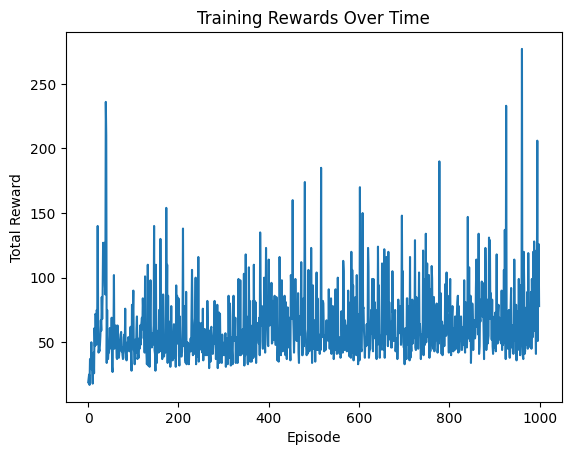

In [101]:
env = gym.make('CartPole-v1')
policy = PolicyWithBaseline()
episodes = 1000
rewards_with_baseline = reinforce_with_baseline(env, policy, episodes)
plot_rewards(rewards_with_baseline)

In [102]:
total_rewards = []
for _ in range(5):
    state = env.reset()[0]
    done = False
    total_reward = 0
    while not done:
        action = policy.sample_action(state)
        state, reward, done, _, _ = env.step(action)
        total_reward += reward
    total_rewards.append(total_reward)
print(f'Average reward over 5 episodes: {sum(total_rewards) / 5}')

Average reward over 5 episodes: 75.0


**Compare and plot the training performance for both the algorithms [3 Marks]**

**Answer 6**

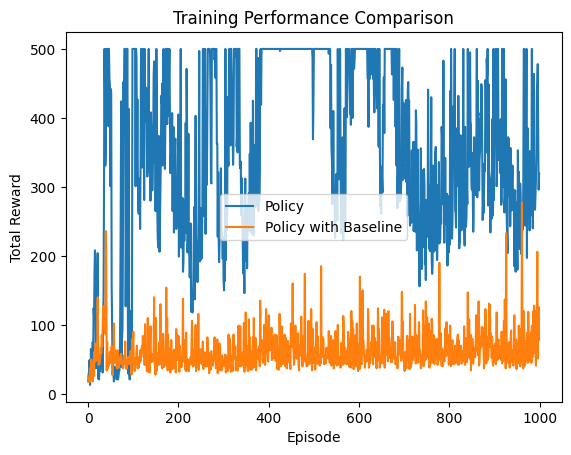

In [105]:
# Plot both rewards on the same graph
plt.plot(rewards, label='Policy')
plt.plot(rewards_with_baseline, label='Policy with Baseline')
plt.title('Training Performance Comparison')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.show()
